## MiniBatch

### 학습하는 방법
- batch      전체 데이터를 한꺼번에 학습시키는 방법 ex) 10000개 전체를 일괄처리
- minibatch  전체 데이터를 mini batch 단위로 나누어서 학습시키는 방법 ex) 10000개라면 100개씩 나누어 돌림
- online     10000개를 샘플1개씩 다 돌려봄

In [1]:
from sklearn.datasets import make_blobs
x, y = make_blobs(n_samples = 150000, cluster_std = [1.0, 2.5, 0.5], random_state = 170)
# 데이터를 랜덤으로 생성, cluster_std: 표준편차

In [2]:
# 기본모형 (클러스터수=3)
from sklearn.cluster import KMeans
model1 = KMeans(n_clusters=3).fit(x)

c:\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [3]:
# 미니배치 적용모형 : 데이터를 미니배치 크기만큼 무작위로 분리하여 처리
from sklearn.cluster import MiniBatchKMeans
model2 = MiniBatchKMeans(n_clusters=3, batch_size=1536).fit(x)
# batch_size : 미니배치사이즈

c:\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)


In [4]:
from sklearn.metrics.cluster import silhouette_score  
print(silhouette_score(x[:10000], model1.predict(x[:10000])))
print(silhouette_score(x[:10000], model2.predict(x[:10000])))
# 전체를 비교하면 시간이 많이 걸려서 10000건까지만 비교
# 미니배치를 해도 silhoutte_score에 큰 차이가 없음 : 메모리 절약을 위해 mini_batch 사용

0.6486891952788992
0.6487166212780295


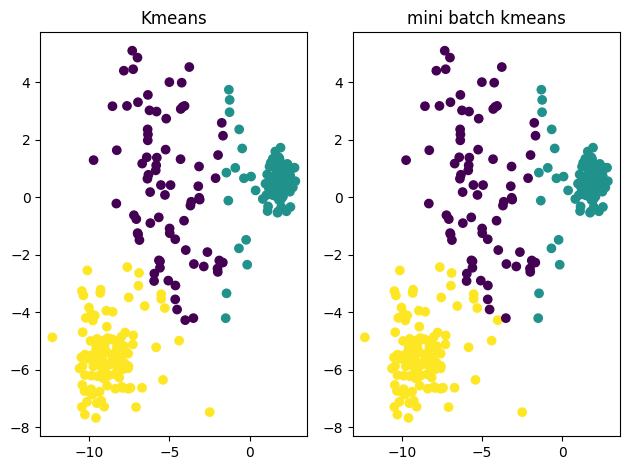

In [5]:
import matplotlib.pyplot as plt
import numpy as np
idx = np.random.randint(150000, size=300)
plt.subplot(121)
plt.scatter(x[idx, 0], x[idx, 1], c=model1.labels_[idx])
plt.title("Kmeans")
plt.subplot(122)
plt.scatter(x[idx, 0], x[idx, 1], c=model2.labels_[idx])
plt.title("mini batch kmeans")
plt.tight_layout()
plt.show()

# 결과는 큰 차이가 없음

### ex) Iris데이터

In [2]:
import pandas as pd
import seaborn as sns

df = sns.load_dataset('iris')
df.columns

cols=['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

X=df[cols]  

y=df['species']

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

from sklearn.cluster import MiniBatchKMeans
# batch_size 기본값 100개
model = MiniBatchKMeans(n_clusters=3, random_state=0, batch_size=50)
model.fit(X_std)

# clustering 결과
model.labels_

c:\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

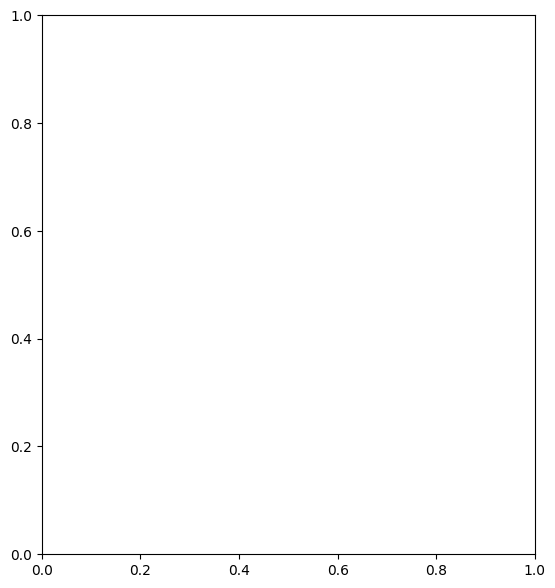

In [3]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(14,7))
colormap = np.array(['red', 'lime', 'black'])

# 그래프 출력(정답)
plt.subplot(1, 2, 1)
plt.scatter(X['petal_length'], X['petal_width'], c=colormap[y], s=40)
plt.title('real')

# 그래프 출력(클러스터링)
plt.subplot(1, 2, 2)
plt.scatter(X['petal_length'], X['petal_width'], c=colormap[model.labels_], s=40)
plt.title('clustering')

# clustering은 비교적 잘 되었으나 색상이 다름(label이 다르게 매겨짐)
# kmeans 알고리즘은 정답을 미리 알려주지 않는 비지도학습
# 그룹이 잘 나누어지므로 라벨 번호는 중요하지 않음

In [ ]:
plt.figure(figsize=(14,7))
colors1 = np.array(['red', 'lime', 'black'])
colors2 = np.array(['black', 'red', 'lime'])

# 그래프 출력(정답)
plt.subplot(1, 2, 1)
plt.scatter(X['petal_length'], X['petal_width'], c=colormap[y], s=40)
plt.title('real')

# 그래프 출력(예측)
plt.subplot(1, 2, 2)
plt.scatter(X['petal_length'], X['petal_width'], c=colormap[model.labels_], s=40)
plt.title('clustering')

### ex) face

In [8]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_sample_image
from sklearn.feature_extraction import image

# 샘플이미지 로딩
one_image = load_sample_image("china.jpg")
one_image

array([[[174, 201, 231],
        [174, 201, 231],
        [174, 201, 231],
        ...,
        [250, 251, 255],
        [250, 251, 255],
        [250, 251, 255]],

       [[172, 199, 229],
        [173, 200, 230],
        [173, 200, 230],
        ...,
        [251, 252, 255],
        [251, 252, 255],
        [251, 252, 255]],

       [[174, 201, 231],
        [174, 201, 231],
        [174, 201, 231],
        ...,
        [252, 253, 255],
        [252, 253, 255],
        [252, 253, 255]],

       ...,

       [[ 88,  80,   7],
        [147, 138,  69],
        [122, 116,  38],
        ...,
        [ 39,  42,  33],
        [  8,  14,   2],
        [  6,  12,   0]],

       [[122, 112,  41],
        [129, 120,  53],
        [118, 112,  36],
        ...,
        [  9,  12,   3],
        [  9,  15,   3],
        [ 16,  24,   9]],

       [[116, 103,  35],
        [104,  93,  31],
        [108, 102,  28],
        ...,
        [ 43,  49,  39],
        [ 13,  21,   6],
        [ 15,  24,   7]]

In [9]:
one_image.shape     
# 가로, 세로, 채널(흑백1, 컬러3)

(427, 640, 3)

([], [])

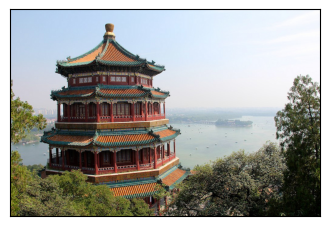

In [10]:
# 전체 이미지
plt.figure(figsize=(4,4))
plt.imshow(one_image, cmap=plt.cm.gray)
plt.xticks(())
plt.yticks(())

In [11]:
# 부분 이미지 리스트
# (100,150) patch size
patches = image.extract_patches_2d(one_image, (100, 150))    # 부분이미지를 뽑아냄
print(patches.shape)   # 원본이미지를 잘개 나눈 세트

(161048, 100, 150, 3)


([], [])

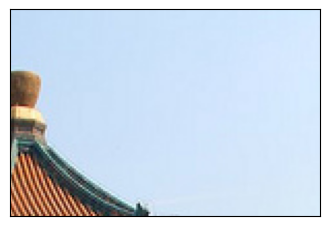

In [13]:
#부분 이미지
plt.figure(figsize=(4, 4))
plt.imshow(patches[200], cmap=plt.cm.gray)
plt.xticks(())
plt.yticks(())

In [14]:
import time
import numpy as np
from sklearn import datasets
from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.image import extract_patches_2d
faces = datasets.fetch_olivetti_faces()

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to C:\Users\tjoeun\scikit_learn_data


In [15]:
faces.data.shape   

(400, 4096)

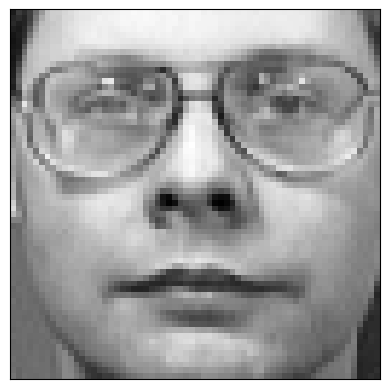

In [16]:
plt.imshow(faces.data[30].reshape(64,64), cmap=plt.cm.gray)   # 그림으로 그릴 때는 2차원으로 바꿔야 함
plt.xticks(())
plt.yticks(())
plt.show()

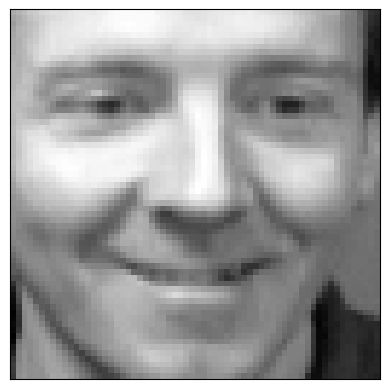

In [18]:
plt.imshow(faces.data[20].reshape(64,64), cmap=plt.cm.gray)
plt.xticks(())
plt.yticks(())
plt.show()

In [22]:
kmeans = MiniBatchKMeans(n_clusters = 81, random_state=0, verbose=True)   
# 총 81명이므로 n_clusters = 81, 미니배치 사이즈 디폴트값: 1024

In [25]:
# 부분이미지 사이즈
patch_size = (20,20)
buffer = []
t0 = time.time()

# 400장의 이미지를 6회 반복: 2400
index = 0
for _ in range(6): # 전체 데이터를 6회 반복 (변수 쓸일이 없으면 '_'로 표시)
    for img in faces.images: # 400장의 이미지
        data = extract_patches_2d(img, patch_size, max_patches=50,random_state=0)
        data = np.reshape(data, (len(data), -1))
        buffer.append(data)
        index += 1
        if index % 10 == 0:
            #버퍼에 누적
            data = np.concatenate(buffer, axis=0)
            data -= np.mean(data, axis=0)  # 정규화처리
            data /= np.std(data, axis=0)   # 정규화처리 
            kmeans.partial_fit(data)    # 부분학습. 부분이미지이므로 누적을 시켜야 함
            buffer = []
            
        if index % 100 == 0:
            print('부분 학습 : %4i / %i'% (index, 6 * len(faces.images)))
dt = time.time() - t0
print('실행시간:', dt)

[MiniBatchKMeans] Reassigning 72 cluster centers.
부분 학습 :  100 / 2400
부분 학습 :  200 / 2400
부분 학습 :  300 / 2400
부분 학습 :  400 / 2400
[MiniBatchKMeans] Reassigning 1 cluster centers.
부분 학습 :  500 / 2400
[MiniBatchKMeans] Reassigning 3 cluster centers.
[MiniBatchKMeans] Reassigning 6 cluster centers.
[MiniBatchKMeans] Reassigning 8 cluster centers.
부분 학습 :  600 / 2400
[MiniBatchKMeans] Reassigning 6 cluster centers.
[MiniBatchKMeans] Reassigning 2 cluster centers.
부분 학습 :  700 / 2400
[MiniBatchKMeans] Reassigning 5 cluster centers.
[MiniBatchKMeans] Reassigning 5 cluster centers.
부분 학습 :  800 / 2400
[MiniBatchKMeans] Reassigning 1 cluster centers.
[MiniBatchKMeans] Reassigning 1 cluster centers.
부분 학습 :  900 / 2400
부분 학습 : 1000 / 2400
[MiniBatchKMeans] Reassigning 1 cluster centers.
부분 학습 : 1100 / 2400
[MiniBatchKMeans] Reassigning 1 cluster centers.
부분 학습 : 1200 / 2400
[MiniBatchKMeans] Reassigning 1 cluster centers.
부분 학습 : 1300 / 2400
부분 학습 : 1400 / 2400
[MiniBatchKMeans] Reassigning 1 c

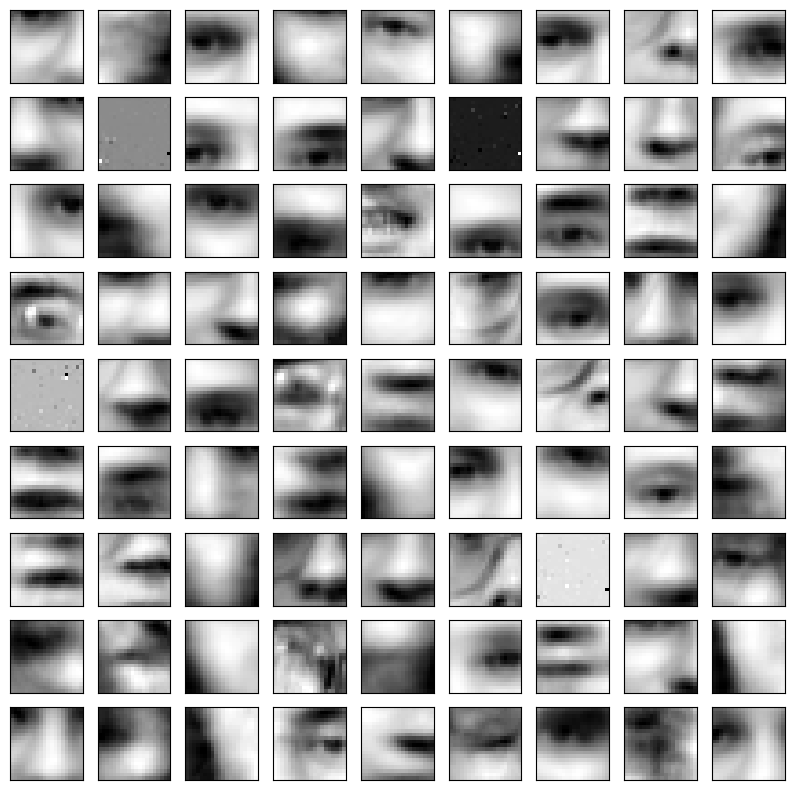

In [26]:
plt.figure(figsize=(10, 10))
for i, patch in enumerate(kmeans.cluster_centers_):
    plt.subplot(9, 9, i + 1)
    plt.imshow(patch.reshape(patch_size), cmap=plt.cm.gray)
    plt.xticks(())
    plt.yticks(())
plt.show()